# Libraries Import

In [68]:
import numpy as np
import pandas as pd

# Data Load

In [69]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [70]:
train

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,SESSION_252284,USER_206021,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,youtube.com,referral,NaN,Category5_Path_0032
252285,SESSION_252285,USER_206022,1.0,Chrome,Macintosh,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
252286,SESSION_252286,USER_164240,5.0,Chrome,Macintosh,desktop,0,2.0,69.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
252287,SESSION_252287,USER_206023,1.0,Android Webview,Android,mobile,1,1.0,28.0,0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,NaN,Category2_Path_0018


In [71]:
test

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,SESSION_332070,USER_268999,Internet Explorer,Windows,tablet,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,search.xfinity.com,referral,NaN,Category1
79782,SESSION_332071,USER_269000,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
79783,SESSION_332072,USER_269001,Safari,Macintosh,desktop,1,1.0,22.0,0,0.0,0.0,Oceania,Australasia,Australia,google,organic,Category8,NaN
79784,SESSION_332073,USER_269002,Safari,iOS,mobile,1,1.0,135.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN


# Data Preprocess

### Missing Values

In [72]:
display(train.isnull().sum())
display(test.isnull().sum())
display(train.isnull().sum() / train.shape[0] * 100)
display(test.isnull().sum() / test.shape[0] * 100)

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64

sessionID               0.000000
userID                  0.000000
TARGET                  0.000000
browser                 0.000000
OS                      0.000000
device                  0.000000
new                     0.000000
quality                 0.000000
duration                0.000000
bounced                 0.000000
transaction             0.000000
transaction_revenue     0.000000
continent               0.000000
subcontinent            0.000000
country                 0.000000
traffic_source          0.000000
traffic_medium          0.000000
keyword                54.570354
referral_path          63.858115
dtype: float64

sessionID               0.000000
userID                  0.000000
browser                 0.000000
OS                      0.000000
device                  0.000000
new                     0.000000
quality                 0.000000
duration                0.000000
bounced                 0.000000
transaction             0.000000
transaction_revenue     0.000000
continent               0.000000
subcontinent            0.000000
country                 0.000000
traffic_source          0.000000
traffic_medium          0.000000
keyword                53.981902
referral_path          67.544431
dtype: float64

In [ ]:
train[train['device'].isnull()]

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path


In [ ]:
train = train.drop(train[train['device'].isnull()].index)

### Column Drop

In [73]:
drop_cols = ['sessionID', 'userID', 'keyword', 'referral_path']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [74]:
print(train.shape)
print(test.shape)

(252289, 15)
(79786, 14)


In [75]:
display(train.isnull().sum() / train.shape[0] * 100)
display(test.isnull().sum() / test.shape[0] * 100)

TARGET                 0.0
browser                0.0
OS                     0.0
device                 0.0
new                    0.0
quality                0.0
duration               0.0
bounced                0.0
transaction            0.0
transaction_revenue    0.0
continent              0.0
subcontinent           0.0
country                0.0
traffic_source         0.0
traffic_medium         0.0
dtype: float64

browser                0.0
OS                     0.0
device                 0.0
new                    0.0
quality                0.0
duration               0.0
bounced                0.0
transaction            0.0
transaction_revenue    0.0
continent              0.0
subcontinent           0.0
country                0.0
traffic_source         0.0
traffic_medium         0.0
dtype: float64

### Duplicate Values

In [76]:
train[train.duplicated(keep=False)]

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium
1,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic
2,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none)
3,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate
4,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral
5,1.0,Chrome,Android,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,cpc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,youtube.com,referral
252285,1.0,Chrome,Macintosh,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic
252286,5.0,Chrome,Macintosh,desktop,0,2.0,69.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none)
252287,1.0,Android Webview,Android,mobile,1,1.0,28.0,0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral


### Outliers & Anomaly

In [77]:
train.dtypes

TARGET                 float64
browser                 object
OS                      object
device                  object
new                      int64
quality                float64
duration               float64
bounced                  int64
transaction            float64
transaction_revenue    float64
continent               object
subcontinent            object
country                 object
traffic_source          object
traffic_medium          object
dtype: object

In [78]:
display(train.describe())
display(test.describe())

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


,new,quality,duration,bounced,transaction,transaction_revenue
count,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,7.978600e+04
mean,0.734515,3.967576,121.550635,0.496804,0.007909,9.552892e+05
std,0.441594,11.349192,349.168791,0.499993,0.095260,2.714007e+07
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000e+00
75%,1.000000,1.000000,75.000000,1.000000,0.000000,0.000000e+00
max,1.000000,98.000000,9316.000000,1.000000,7.000000,4.609835e+09


In [79]:
categorical_cols = ['browser', 'OS', 'device', 'continent', 'subcontinent', 'country', 'traffic_source', 'traffic_medium']

In [80]:
for col in categorical_cols:
    print(col, ':')
    print(train[col].nunique())
    print(train[col].value_counts())

browser :
70
Chrome                                                  174395
Safari                                                   35689
Android Webview                                          13855
Firefox                                                   8436
Internet Explorer                                         4573
                                                         ...  
eosutpkiahjzvdgcwxlmyfqbrn                                   1
;__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;         1
wvsmagudcqeytijorlhxnfzkbp                                   1
efkaxnbyohqtspzlvcwrjmigdu                                   1
NokiaC7-00                                                   1
Name: browser, Length: 70, dtype: int64
OS :
21
Windows             88119
Macintosh           60316
Android             51870
iOS                 29778
Linux                9562
Chrome OS            9222
(not set)            2592
Tizen                 321
Samsung               259
Windows Phon

In [81]:
for col in categorical_cols:
    print(col, ':')
    print(test[col].nunique())
    print(test[col].value_counts())

browser :
45
Chrome                                                  57503
Safari                                                  11368
Firefox                                                  2634
Android Webview                                          2222
Internet Explorer                                        1360
Edge                                                     1153
Opera Mini                                               1090
Samsung Internet                                          882
Safari (in-app)                                           521
Opera                                                     437
UC Browser                                                254
YaBrowser                                                  89
Amazon Silk                                                80
Coc Coc                                                    67
Mozilla Compatible Agent                                   49
Android Browser                                          

In [82]:
def subcontinent(df) :
    df.loc[df["subcontinent"].isin(["South America", "Central America", "Caribbean"]), "subcontinent"] = "Latin America"
    df.loc[df["subcontinent"].isin(["Southern Africa", "Western Africa", "Eastern Africa", "Middle Africa"]), "subcontinent"] = "Sub-Saharan Africa"
    return df
train = subcontinent(train)
test = subcontinent(test)

In [ ]:
# def numeric(data) :
#     data["duration_quality_ratio"] = data["quality"] / data["duration"]
#     data.loc[data["duration_quality_ratio"] == np.inf, "duration_quality_ratio"] = 1
#     condition = (data["transaction"] >= 1.0) & (data["transaction_revenue"] == 0)
#     data.loc[condition, "transaction"] = 0.0
#     return data

### Standardization

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['quality', 'transaction_revenue']] = scaler.fit_transform(train[['quality', 'transaction_revenue']])
test[['quality', 'transaction_revenue']] = scaler.transform(test[['quality', 'transaction_revenue']])

# Data Split

In [84]:
target = train["TARGET"]
train = train.drop(["TARGET"], axis=1)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train, target, test_size=0.1, random_state=42)

# Ecoding
## One-hot encoding: 범주가 2개인 변수가 없으므로 제외
## Label encoding

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encoding(df):
    df_new = df.copy(deep=True)
    for col in categorical_cols:
        df_new[col] = le.fit_transform(df[col].values)
    return df_new
X_train = encoding(x_train)
X_valid = encoding(x_valid)

**x_train**, **x_valid**: catboost용 (모델링할 때 알아서 encoding)  
**X_train**, **X_valid**: 나머지 모델링 용

In [87]:
display(x_valid)
display(X_valid)

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium
33522,Safari,iOS,tablet,1,-0.163809,329.0,0,0.0,-0.042587,Africa,Sub-Saharan Africa,Somalia,youtube.com,referral
19669,Chrome,Macintosh,desktop,1,-0.253972,0.0,1,0.0,-0.042587,Americas,Northern America,United States,google,organic
135170,Android Webview,Android,mobile,1,-0.253972,38.0,0,0.0,-0.042587,Africa,Northern Africa,Egypt,youtube.com,referral
33577,Edge,Windows,desktop,1,-0.253972,103.0,0,0.0,-0.042587,Americas,Northern America,United States,youtube.com,referral
138451,Android Webview,Android,mobile,1,-0.253972,31.0,0,0.0,-0.042587,Africa,Northern Africa,Egypt,youtube.com,referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134840,Chrome,Macintosh,desktop,1,-0.253972,42.0,0,0.0,-0.042587,Asia,Southeast Asia,Singapore,(direct),(none)
190258,Android Webview,Android,mobile,1,-0.253972,147.0,0,0.0,-0.042587,Asia,Western Asia,Turkey,youtube.com,referral
66399,Chrome,Macintosh,desktop,0,-0.163809,31.0,0,0.0,-0.042587,Americas,Northern America,United States,google,cpc
7742,Chrome,Macintosh,desktop,0,-0.253972,34.0,0,0.0,-0.042587,Asia,Southern Asia,India,(direct),(none)


,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium
33522,24,14,2,1,-0.163809,329.0,0,0.0,-0.042587,1,15,141,77,6
19669,9,6,0,1,-0.253972,0.0,1,0.0,-0.042587,2,9,163,21,5
135170,8,1,1,1,-0.253972,38.0,0,0.0,-0.042587,1,8,45,77,6
33577,11,11,0,1,-0.253972,103.0,0,0.0,-0.042587,2,9,163,77,6
138451,8,1,1,1,-0.253972,31.0,0,0.0,-0.042587,1,8,45,77,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134840,9,6,0,1,-0.253972,42.0,0,0.0,-0.042587,3,12,138,0,0
190258,8,1,1,1,-0.253972,147.0,0,0.0,-0.042587,3,16,157,77,6
66399,9,6,0,0,-0.163809,31.0,0,0.0,-0.042587,2,9,163,21,3
7742,9,6,0,0,-0.253972,34.0,0,0.0,-0.042587,3,13,71,0,0


# Modeling

In [88]:
from sklearn.metrics import mean_squared_error

## Not Ensemble

### Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

print(lin.coef_)
print(lin.intercept_)

[-4.36543388e-03  6.54762998e-03  2.19716898e-01  6.56921965e-01
  2.33612818e+00  5.21407020e-03 -2.81859667e+00  1.85574115e+00
  6.17620552e-02  8.57858859e-02 -3.06186096e-02  9.85885824e-05
 -4.49393671e-03  1.26596498e-01]
3.673463001587635


In [90]:
y_train_pred = lin.predict(X_train)
y_valid_pred = lin.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

3.5843105515697067
3.430657038072969


**Linear Regression**:
- 3.5843105515697067
- 3.430657038072969

### RANSAC

In [91]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(max_trials=100, min_samples=100, loss='squared_error', residual_threshold=5.0, random_state=42)
ransac.fit(X_train, y_train)

RANSACRegressor(loss='squared_error', min_samples=100, random_state=42,
                residual_threshold=5.0)

In [92]:
y_train_pred = ransac.predict(X_train)
y_valid_pred = ransac.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

3.966010821046792
3.7626764741529786


**RANSAC Regressor**:
- 3.966010821046792
- 3.7626764741529786

### SVR

In [ ]:
from sklearn.svm import SVR
# 선형
svl = SVR(kernel='linear', C=1.0, epsilon=0.1)
svl.fit(X_train, y_train)
# 비선형
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

In [ ]:
y_train_pred = svl.predict(X_train)
y_valid_pred = svl.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

In [ ]:
y_train_pred = svr.predict(X_train)
y_valid_pred = svr.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

너무 오래 걸려서 포기...

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [94]:
y_train_pred = tree.predict(X_train)
y_valid_pred = tree.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

3.4846532300342283
3.311539048967329


**Decision Tree**(max_depth=4):
- 3.2632253160114573
- 3.3440597103538163  

**Decision Tree**(max_depth=3):
- 3.4846532300342283
- 3.311539048967329

## Ensembles

### Gradient Boosting

In [140]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators=11, max_depth=5)
grad.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=11)

In [141]:
y_train_pred = grad.predict(X_train)
y_valid_pred = grad.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

3.2746274101495305
3.2102921453618682


**Gradient Boosting**:
- 3.2746274101495314
- 3.2102921453618687

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': range(1, 20), 'max_depth': range(3, 15)}
gb_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param, scoring='neg_mean_squared_error', cv=10, verbose=1)
gb_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_train_pred = gb_search.predict(X_train)
y_valid_pred = gb_search.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

### XGBoost

In [142]:
from xgboost import XGBRegressor
xg = XGBRegressor(objective='reg:squarederror', booster='gbtree', colsample_bytree=0.75, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=30)
xg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, ...)

In [143]:
y_train_pred = xg.predict(X_train)
y_valid_pred = xg.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

2.8631355851268103
2.77067865191809


**XGBoost**:
- 2.8631355851268103
- 2.77067865191809

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': range(100, 500, 50), 'max_depth': range(3, 15, 1), 'colsample_bytree': [i / 100 for i in range(75, 90, 5)]}
search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', max_depth=5, alpha=10), param_grid=param, scoring='neg_mean_squared_error', cv=10)
xgsearch.fit(X_train, y_train)

### LightGBM

In [144]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(booster='gbtree', colsample_bytree=0.75, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 991
[LightGBM] [Info] Number of data points in the train set: 227060, number of used features: 14
[LightGBM] [Info] Start training from score 3.592412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMRegressor(alpha=10, booster='gbtree', colsample_bytree=0.75, max_depth=5)

In [145]:
y_train_pred = lgbm.predict(X_train)
y_valid_pred = lgbm.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
2.630074428597867
2.783744598246567


**LightGBM**:
- 2.630074428597867
- 2.783744598246567

### Random Forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15, max_depth=4, criterion='squared_error', random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=15, random_state=42)

In [180]:
y_train_pred = rf.predict(X_train)
y_valid_pred = rf.predict(X_valid)

print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

3.1863218819912142
3.248570810991667


**Random Forest**:
- 3.1863218819912142
- 3.248570810991667

### CatBoost

In [182]:
from catboost import CatBoostRegressor, Pool
from bayes_opt import BayesianOptimization

categorical_features = [
    "browser",
    "OS",
    "device",
    "subcontinent",
    "country",
    "traffic_source",
    "traffic_medium",
    "continent"
]

train_pool = Pool(data=x_train, label=y_train, cat_features=categorical_features)
valid_pool = Pool(data=x_valid, label=y_valid, cat_features=categorical_features)

cat = CatBoostRegressor(iterations=2000, learning_rate=0.1, random_strength=0.5, depth=7, random_state=42, verbose=100)
cat.fit(train_pool, eval_set=(valid_pool), verbose=2)

0:	learn: 5.1709414	test: 5.0151927	best: 5.0151927 (0)	total: 1.08s	remaining: 36m 7s
2:	learn: 4.6052138	test: 4.4290782	best: 4.4290782 (2)	total: 2.58s	remaining: 28m 39s
4:	learn: 4.1690988	test: 3.9778561	best: 3.9778561 (4)	total: 3.51s	remaining: 23m 21s
6:	learn: 3.8499631	test: 3.6509689	best: 3.6509689 (6)	total: 4.5s	remaining: 21m 22s
8:	learn: 3.6061969	test: 3.4016439	best: 3.4016439 (8)	total: 5.39s	remaining: 19m 53s
10:	learn: 3.4193554	test: 3.2088966	best: 3.2088966 (10)	total: 6.32s	remaining: 19m 3s
12:	learn: 3.2808623	test: 3.0683237	best: 3.0683237 (12)	total: 7.9s	remaining: 20m 7s
14:	learn: 3.1772843	test: 2.9711407	best: 2.9711407 (14)	total: 9.55s	remaining: 21m 4s
16:	learn: 3.1001780	test: 2.8911052	best: 2.8911052 (16)	total: 11s	remaining: 21m 17s
18:	learn: 3.0387352	test: 2.8253100	best: 2.8253100 (18)	total: 11.8s	remaining: 20m 27s
20:	learn: 2.9918991	test: 2.7835061	best: 2.7835061 (20)	total: 12.7s	remaining: 19m 54s
22:	learn: 2.9546772	test: 2

In [183]:
y_train_pred = cat.predict(train_pool)
y_valid_pred = cat.predict(valid_pool)

test_pool = Pool(data=test, cat_features=categorical_features)
test_pred = cat.predict(test_pool)
test_pred = [0 if i < 0 else i for i in test_pred]

In [184]:
print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

2.4712483526664326
2.511695928316784


**CatBoost**:
- 2.4712483526664326
- 2.511695928316784

# Result

**Linear Regression**:
- 3.5843105515697067
- 3.430657038072969

**RANSAC Regressor**:
- 3.966010821046792
- 3.7626764741529786

**Decision Tree**(max_depth=4):
- 3.2632253160114573
- 3.3440597103538163  

**Decision Tree**(max_depth=3):
- 3.4846532300342283
- 3.311539048967329

**Gradient Boosting**:
- 3.2746274101495314
- 3.2102921453618687

**XGBoost**:
- 2.8631355851268103
- 2.77067865191809

**LightGBM**:
- 2.630074428597867
- 2.783744598246567

**CatBoost**:
- 2.4712483526664326
- 2.511695928316784

# Feature Importances

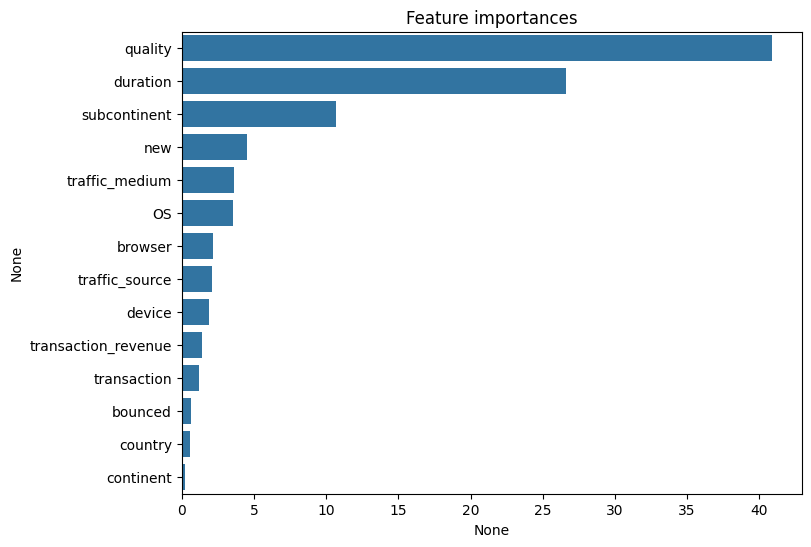

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cat_importances_values = cat.feature_importances_
cat_importances = pd.Series(cat_importances_values, index=X_train.columns)
cat_top20 = cat_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=cat_top20, y=cat_top20.index)
plt.show()

# Submission

In [ ]:
df_submit = pd.read_csv('/content/sample_data/sample_submission.csv')
df_submit['TARGET'] = test_pred
df_submit.to_csv(".csv", index=False)